In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn import linear_model
import plotly.express as px


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [3]:
def preprocess(df):
    # df = df.dropna()
    # df = df[df["Crop"]=="Avocados"]
    # df = df.drop(columns="Crop", axis=1)
    # df = df.drop(columns="Year", axis=1)
    df['Export Quantity'] = df['Export Quantity'].interpolate(method='linear', limit_direction='backward', axis=0)
    scaler = preprocessing.StandardScaler()
    scal_feat = ['Temperature (Avg)','Precipitation','Export Quantity','Fertilizer Usage']
    df[scal_feat]=scaler.fit_transform(df[scal_feat].to_numpy())
    feat = scal_feat + ["Crop"]
    X = df[feat].copy(deep=True)
    X = pd.get_dummies(X, columns = ['Crop'])
    y = df['Yield'].copy(deep=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

    return X_train, X_test, y_train, y_test, X

In [4]:
def compute_scores(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse) 
    r2 = metrics.r2_score(y_test, y_pred)
    print("MAE : ",mae)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("R2 : ",r2)

In [5]:
df = pd.read_csv("Data/crop_yield_data.csv")

In [6]:
df = df.drop(columns=["Year"], axis =1 )

In [7]:
X_train, X_test, y_train, y_test, X = preprocess(df)

In [8]:
X_train.head()

,Temperature (Avg),Precipitation,Export Quantity,Fertilizer Usage,Crop_Avocados,Crop_Bananas,Crop_Rice,Crop_Wheat
9,-0.910168,-0.744023,-0.578619,-0.814703,1,0,0,0
213,0.299166,0.019717,1.910638,0.522640,0,0,0,1
33,0.299166,0.019717,-0.577951,0.522640,1,0,0,0
208,-0.702854,-0.416581,2.399118,0.128124,0,0,0,1
155,-0.823787,0.944014,-0.532183,0.686712,0,0,1,0


In [9]:
y_train.head()

9      43462
213    25270
33     58364
208    22024
155    68593
Name: Yield, dtype: int64

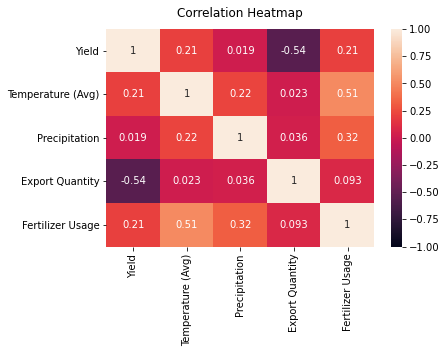

In [10]:
df.corr()
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X_train, y_train)
y_pred_dt = dt_regression.predict(X_test)
compute_scores(y_test, y_pred_dt)

MAE :  10048.020833333334
MSE :  226212470.4375
RMSE :  15040.361379883796
R2 :  0.9079719354215636
